# Explore here

Queremos ser capaces de clasificar casas según su la región en la que se encuentren y del ingreso medio. Para ello, utilizaremos el famoso conjunto de datos California Housing. Se construyó utilizando los datos del censo de California de 1990. Contiene una fila por grupo de bloques censales. Un grupo de bloques es la unidad geográfica más pequeña para la que se publican datos del censo de USA.

In [1]:
# Your code here
import pandas as pd
total_data = pd.read_csv ("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")
total_data.head ()
#total_data.to_csv("../data/raw/total_data.csv", index = False)

/tmp/ipykernel_633/458364372.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [2]:
total_data.drop(["HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup", "MedHouseVal"], axis = 1, inplace = True)
total_data.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [3]:
from sklearn.model_selection import train_test_split

# We divide the dataset into training and test samples
X = total_data

X_train, X_test = train_test_split(X,  test_size = 0.2, random_state = 42)

X_train.head()

,MedInc,Latitude,Longitude
14196,3.2596,32.71,-117.03
8267,3.8125,33.77,-118.16
17445,4.1563,34.66,-120.48
14265,1.9425,32.69,-117.11
2271,3.5542,36.78,-119.80


In [4]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Entrenar el modelo
model = KMeans(n_clusters = 6, random_state = 42)
model.fit(X_train)



KMeans(n_clusters=6, random_state=42)

In [5]:
# Realizar predicciones con datos nuevos
new_data = X_test 
predictions = model.predict(new_data)

In [30]:
# Añadir la columna de cluster al conjunto de datos de entrenamiento
X_train['cluster'] = model.labels_
X_train.head ()

,MedInc,Latitude,Longitude,cluster
14196,3.2596,32.71,-117.03,3
8267,3.8125,33.77,-118.16,1
17445,4.1563,34.66,-120.48,1
14265,1.9425,32.69,-117.11,3
2271,3.5542,36.78,-119.80,5


In [7]:
X_train.info ()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 14196 to 15795
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MedInc     16512 non-null  float64
 1   Latitude   16512 non-null  float64
 2   Longitude  16512 non-null  float64
 3   cluster    16512 non-null  int32  
dtypes: float64(3), int32(1)
memory usage: 580.5 KB


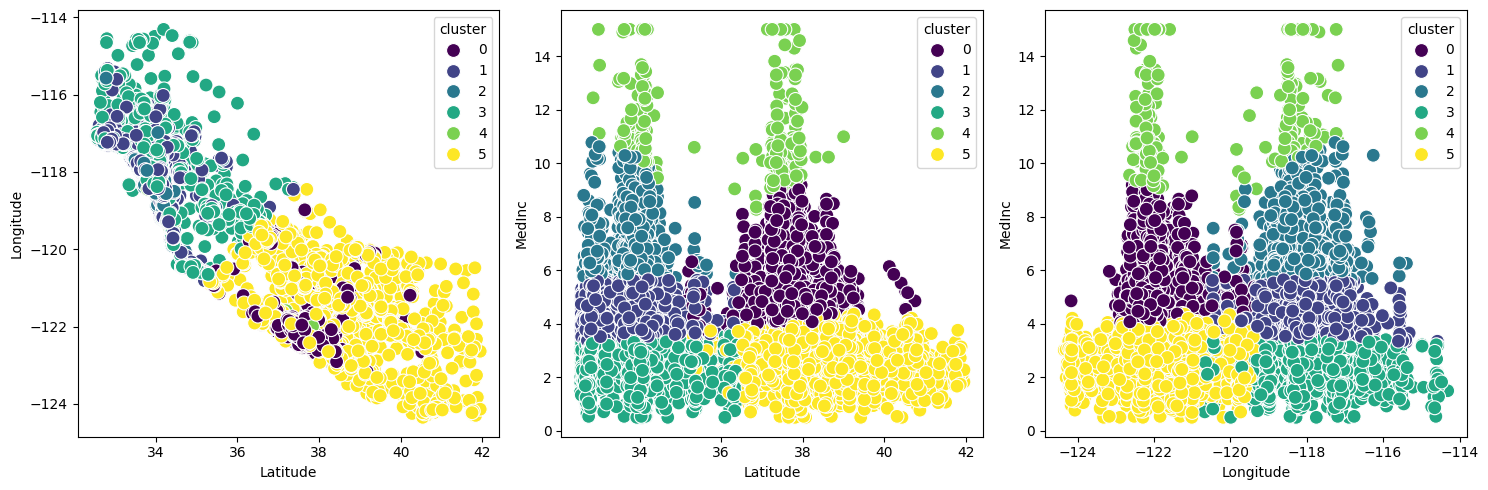

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "cluster",  palette='viridis', s=100)
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster",  palette='viridis', s=100)
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster",  palette='viridis', s=100)
plt.tight_layout()

plt.show()

In [13]:
# Añadir la columna de cluster al conjunto de datos de entrenamiento
X_test['cluster'] = predictions
X_test.head ()

,MedInc,Latitude,Longitude,cluster
20046,1.6812,36.06,-119.01,3
3024,2.5313,35.14,-119.46,3
15663,3.4801,37.80,-122.44,5
20484,5.7376,34.28,-118.72,2
9814,3.7250,36.62,-121.93,5


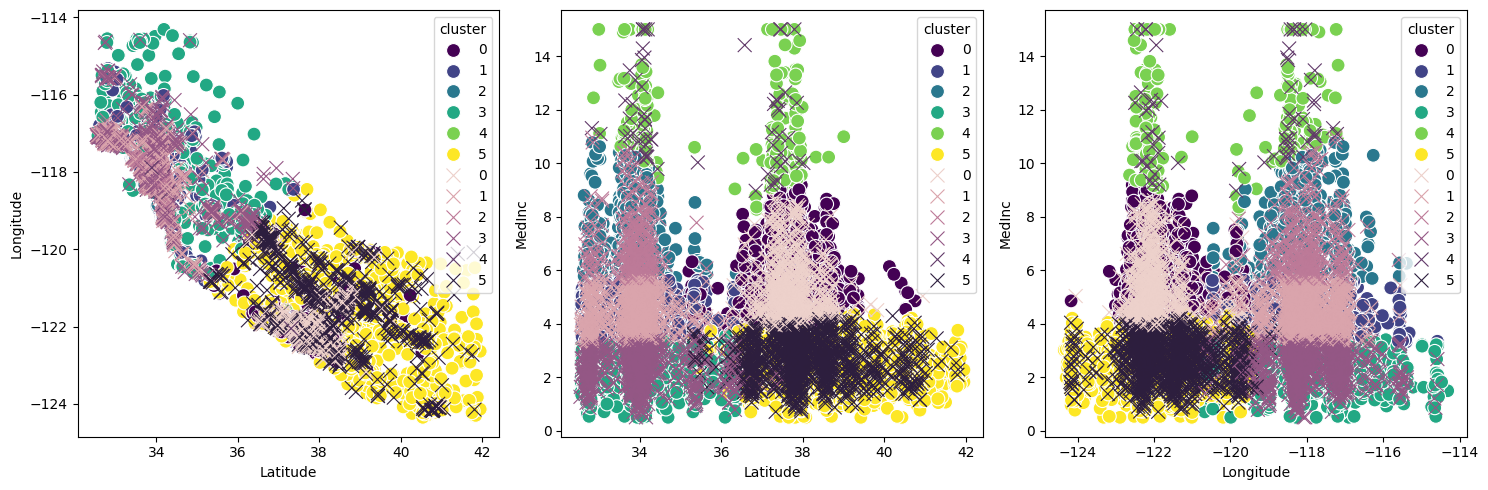

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico con subplots
fig, axis = plt.subplots(1, 3, figsize=(15, 5))

# Gráfico 1
sns.scatterplot(ax=axis[0], data=X_train, x="Latitude", y="Longitude", hue="cluster", palette='viridis', s=100)
# Agregar nuevos puntos al gráfico 1
sns.scatterplot(ax=axis[0], data=X_test, x="Latitude", y="Longitude", hue="cluster", color='red', marker='x', s=100)

# Gráfico 2
sns.scatterplot(ax=axis[1], data=X_train, x="Latitude", y="MedInc", hue="cluster", palette='viridis', s=100)
# Agregar nuevos puntos al gráfico 2
sns.scatterplot(ax=axis[1], data=X_test, x="Latitude", y="MedInc", hue="cluster", color='red', marker='x', s=100)

# Gráfico 3
sns.scatterplot(ax=axis[2], data=X_train, x="Longitude", y="MedInc", hue="cluster", palette='viridis', s=100)
# Agregar nuevos puntos al gráfico 3
sns.scatterplot(ax=axis[2], data=X_test, x="Longitude", y="MedInc", hue="cluster", color='red', marker='x', s=100)

# Ajustar el diseño del gráfico
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [38]:
#Entrena un modelo de clasificación supervisada
y_train= X_train["cluster"] 
y_test= X_test["cluster"] 



In [40]:
X_train_s= X_train.drop(["cluster"], axis = 1)
X_test_s = X_test.drop(["cluster"], axis = 1)


In [41]:
from sklearn.tree import DecisionTreeClassifier

model_superv = DecisionTreeClassifier(random_state = 42)
model_superv.fit(X_train_s, y_train)

DecisionTreeClassifier(random_state=42)

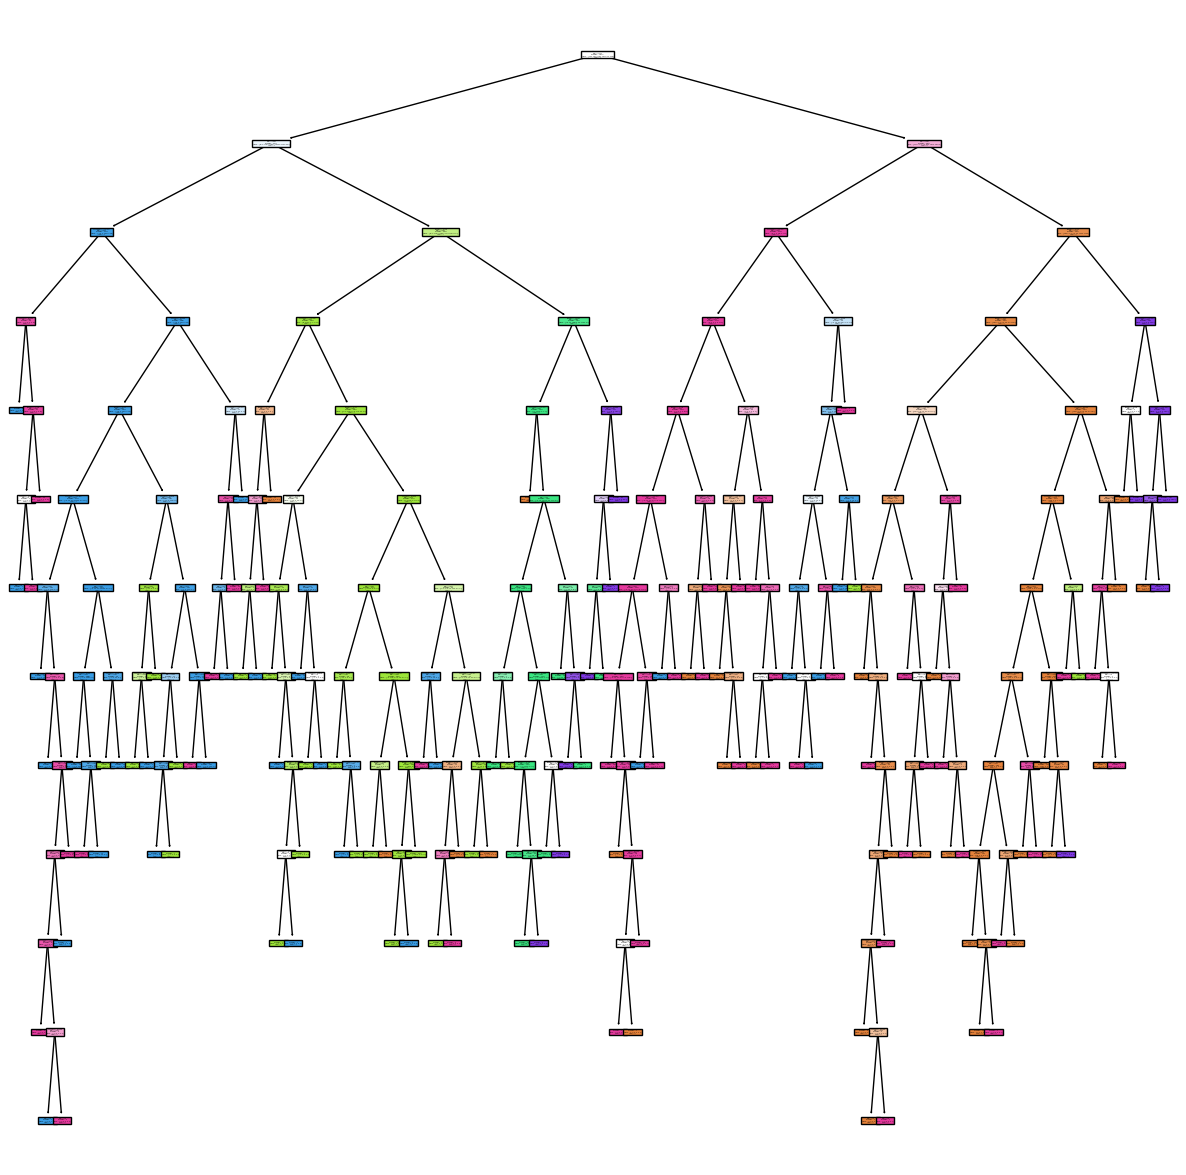

In [42]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model_superv, feature_names = list(X_train_s.columns), class_names = ["0", "1", "2","3", "4","5"], filled = True)

plt.show()

In [43]:
y_pred_superv = model_superv.predict(X_test_s)
y_pred_superv

array([3, 3, 5, ..., 4, 5, 1], dtype=int32)

In [44]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_superv)

0.9951550387596899

In [47]:
from pickle import dump

dump(model, open("/workspaces/machine-learning-python-reyna-Kmean/models/k-means_default_42.sav", "wb"))
dump(model_superv, open("/workspaces/machine-learning-python-reyna-Kmean/modelsdecision_tree_classifier_default_42.sav", "wb"))


Se selecciono el modelo supervisado "Decision Tree", este modelo sin necesidad de optimizar los parámetros muestra un alto valor de accuaracy. Ese alto valor podria deberse al set de datos que se usa, y que las etiquetas vienen de un modelo no supervisado. 
